In [46]:
import torch
import torchaudio
import fairseq
from fairseq.models.wav2vec import Wav2Vec2Model

import sys
sys.path.append('/root/mediazen/speech2blendshape')

from src.utils import plot_result

/root/anaconda3/envs/torch18/lib/python3.8/site-packages/llvmlite/llvmpy/__init__.py:3: UserWarning: The module `llvmlite.llvmpy` is deprecated and will be removed in the future.
  warnings.warn(
/root/anaconda3/envs/torch18/lib/python3.8/site-packages/llvmlite/llvmpy/core.py:8: UserWarning: The module `llvmlite.llvmpy.core` is deprecated and will be removed in the future. Equivalent functionality is provided by `llvmlite.ir`.
  warnings.warn(
/root/anaconda3/envs/torch18/lib/python3.8/site-packages/llvmlite/llvmpy/passes.py:17: UserWarning: The module `llvmlite.llvmpy.passes` is deprecated and will be removed in the future. If you are using this code, it should be inlined into your own project.
  warnings.warn(


In [13]:
cp = '/shared/air/shared/youngkim/mediazen/pretrained/wav2vec_small.pt'
model, cfg, task = fairseq.checkpoint_utils.load_model_ensemble_and_task([cp])
model = model[0]

/root/anaconda3/envs/torch18/lib/python3.8/site-packages/hydra/experimental/initialize.py:43: UserWarning: hydra.experimental.initialize() is no longer experimental. Use hydra.initialize()
  deprecation_warning(message=message)
/root/anaconda3/envs/torch18/lib/python3.8/site-packages/hydra/experimental/initialize.py:45: UserWarning: 
The version_base parameter is not specified.
Please specify a compatability version level, or None.
Will assume defaults for version 1.1
  self.delegate = real_initialize(
/root/anaconda3/envs/torch18/lib/python3.8/site-packages/hydra/experimental/compose.py:25: UserWarning: hydra.experimental.compose() is no longer experimental. Use hydra.compose()
  deprecation_warning(message=message)
/root/anaconda3/envs/torch18/lib/python3.8/site-packages/hydra/core/default_element.py:124: UserWarning: In 'config': Usage of deprecated keyword in package header '# @package _group_'.
See https://hydra.cc/docs/next/upgrades/1.0_to_1.1/changes_to_package_header for more i

In [44]:
target_audio = '/root/mediazen/speech2blendshape/notebook/sample.wav'
audio_tensor, sample_rate = torchaudio.load(target_audio)
audio_tensor.shape, f'{audio_tensor.shape[1]/sample_rate}s'

(torch.Size([1, 786112]), '49.132s')

In [43]:
z = model.feature_extractor(audio_tensor)
z.shape

torch.Size([1, 512, 2456])

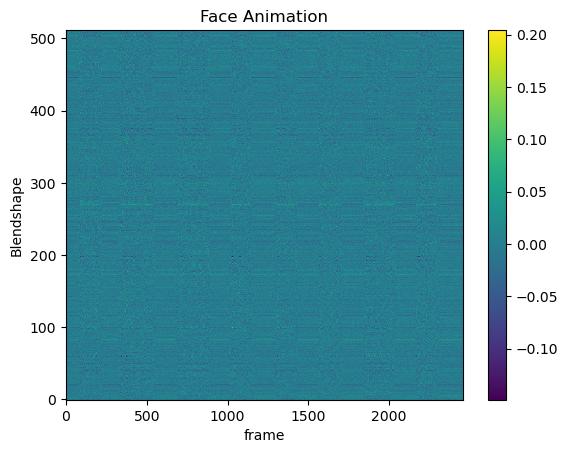

In [48]:
plot_result(z.squeeze().detach())

In [45]:
c = model(audio_tensor)
c['x'].shape

torch.Size([101, 1, 1182])

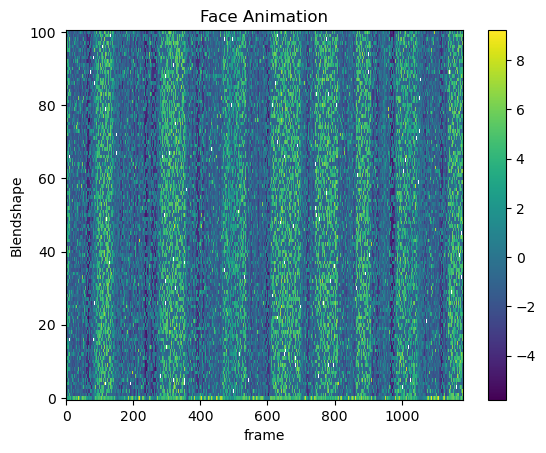

In [47]:
plot_result(c['x'].squeeze().detach())

In [28]:
cp2 = '/shared/air/shared/youngkim/mediazen/pretrained/xlsr_53_56k.pt'
model2, cfg2, task2 = fairseq.checkpoint_utils.load_model_ensemble_and_task([cp])
model2 = model2[0]

/root/anaconda3/envs/torch18/lib/python3.8/site-packages/hydra/experimental/initialize.py:43: UserWarning: hydra.experimental.initialize() is no longer experimental. Use hydra.initialize()
  deprecation_warning(message=message)
/root/anaconda3/envs/torch18/lib/python3.8/site-packages/hydra/experimental/initialize.py:45: UserWarning: 
The version_base parameter is not specified.
Please specify a compatability version level, or None.
Will assume defaults for version 1.1
  self.delegate = real_initialize(
/root/anaconda3/envs/torch18/lib/python3.8/site-packages/hydra/experimental/compose.py:25: UserWarning: hydra.experimental.compose() is no longer experimental. Use hydra.compose()
  deprecation_warning(message=message)
/root/anaconda3/envs/torch18/lib/python3.8/site-packages/hydra/core/default_element.py:124: UserWarning: In 'config': Usage of deprecated keyword in package header '# @package _group_'.
See https://hydra.cc/docs/next/upgrades/1.0_to_1.1/changes_to_package_header for more i

In [30]:
out = model2(wav_input_16khz)

In [33]:
out.keys()

dict_keys(['x', 'padding_mask', 'features_pen', 'prob_perplexity', 'code_perplexity', 'num_vars', 'temp'])